In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from statsmodels.tsa.filters.hp_filter import hpfilter

C:\Users\rpark.CVC\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [59]:
btc = pd.read_html('https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20190521')

In [60]:
btc = btc[0]

In [61]:
dates = btc['Date']

In [63]:
dates = pd.to_datetime(dates)

In [64]:
btc.drop(labels='Date',axis=1,inplace=True)

In [65]:
btc['Date'] = dates

In [66]:
btc.set_index(keys='Date',inplace=True)

In [67]:
btc.head()

,Open*,High,Low,Close**,Volume,Market Cap
Date,,,,,,
2019-05-21,7977.97,8062.17,7843.34,7963.33,25127245056,141065573610
2019-05-20,8196.92,8200.97,7678.78,7978.31,23843404340,141315695728
2019-05-19,7267.96,8261.94,7267.96,8197.69,25902422040,145185076705
2019-05-18,7341.66,7447.27,7251.50,7271.21,21354286562,128761727083
2019-05-17,7886.93,7929.15,7038.12,7343.90,30066644905,130034777633


In [11]:
btc_monthy_average = btc.resample('M')['Close**'].mean()

In [12]:
btc_mon_avg = pd.DataFrame(data=btc_monthy_average)

In [13]:
btc.columns

Index(['Open*', 'High', 'Low', 'Close**', 'Volume', 'Market Cap'], dtype='object')

In [15]:
btc.reset_index(inplace=True)

In [16]:
btc = btc.sort_values(by='Date',axis=0,ascending=True)

In [17]:
btc.set_index(keys='Date',inplace=True)

In [18]:
btc_monthly = btc['Close**'].resample('M',how='mean')

C:\Users\rpark.CVC\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


In [19]:
btc_monthly =pd.DataFrame(btc_monthly)
#129,600

In [20]:
close_cycle, close_trend = hpfilter(btc_monthly['Close**'],lamb=129600)

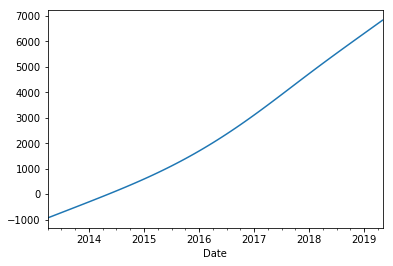

In [21]:
close_trend.plot()

In [22]:
btc_monthly['Trend'] = close_trend

In [23]:
btc_monthly.head()

,Close**,Trend
Date,,
2013-04-30,139.250000,-937.397367
2013-05-31,119.992581,-867.572563
2013-06-30,107.761333,-797.739451
2013-07-31,90.512258,-727.882104
2013-08-31,113.905161,-657.977608


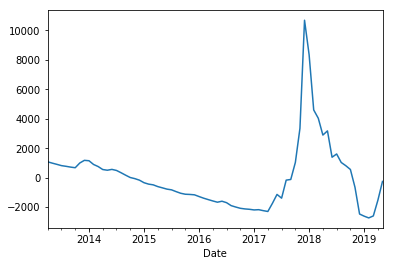

In [24]:
close_cycle.plot()

ETS (Error-Trend-Seasonality)

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
result = seasonal_decompose(btc['Close**'],model='multiplicative')

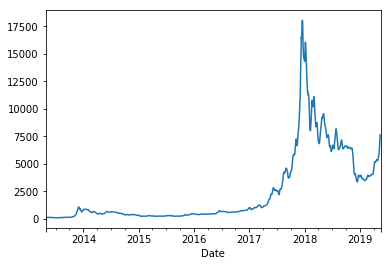

In [27]:
result.trend.plot()

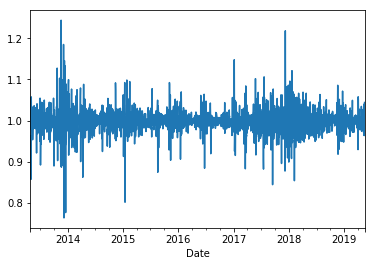

In [28]:
result.resid.plot()

In [29]:
result.nobs

2211

In [30]:
btc['Close**'].mean()

2441.89491632745

EWMA - Exponential Weight Moving Average

In [31]:
btc['Daily MA'] = btc['Close**'].rolling(window=30).mean()

In [32]:
btc_monthly['SMA'] = btc['Close**'].rolling(window=1).mean()

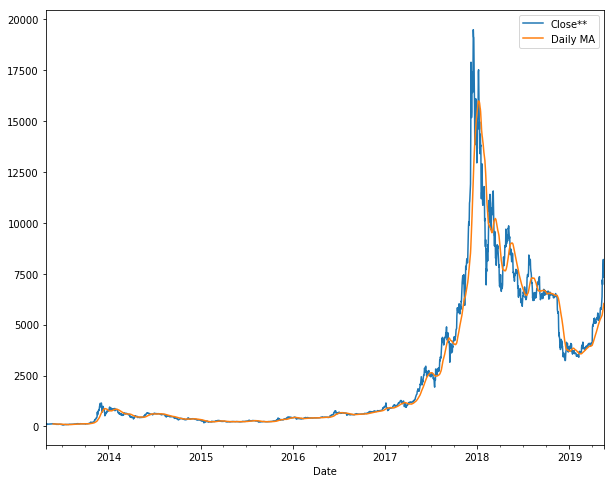

In [33]:
btc[['Close**','Daily MA']].plot(figsize=(10,8))

In [34]:
btc_oct_to_apr = btc.loc["2018-10-01":"2019-04-01"]

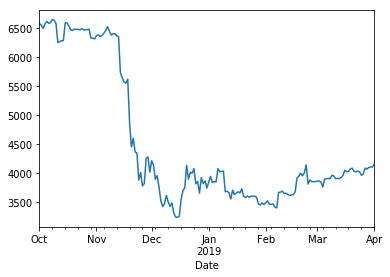

In [35]:
btc_oct_to_apr['Close**'].plot()

In [36]:
close_cycle, close_trend = hpfilter(btc_oct_to_apr['Close**'],lamb=129600)

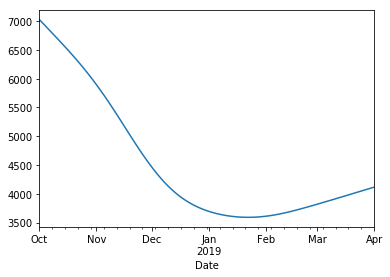

In [37]:
close_trend.plot()

In [38]:
btc_monthly['EMA'] = btc['Close**'].ewm(span=1).mean()

In [39]:
btc_oct_to_apr['EMA'] = btc_oct_to_apr['Close**'].ewm(span=2).mean()

C:\Users\rpark.CVC\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


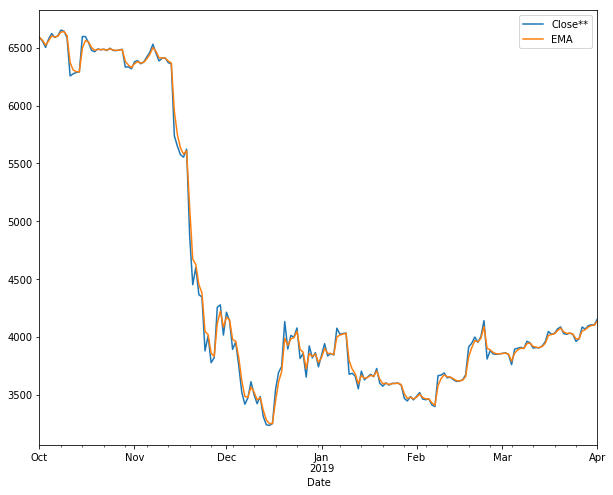

In [40]:
btc_oct_to_apr[['Close**','EMA']].plot(figsize=(10,8))

In [41]:
btc.head()

,Open*,High,Low,Close**,Volume,Market Cap,Daily MA
Date,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,1488566728,NaN
2013-04-29,134.44,147.49,134.00,144.54,-,1603768865,NaN
2013-04-30,144.00,146.93,134.05,139.00,-,1542813125,NaN
2013-05-01,139.00,139.89,107.72,116.99,-,1298954594,NaN
2013-05-02,116.38,125.60,92.28,105.21,-,1168517495,NaN


In [42]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2211 entries, 2013-04-28 to 2019-05-17
Data columns (total 7 columns):
Open*         2211 non-null float64
High          2211 non-null float64
Low           2211 non-null float64
Close**       2211 non-null float64
Volume        2211 non-null object
Market Cap    2211 non-null int64
Daily MA      2182 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 218.2+ KB


In [43]:
x = len(btc)*.8
y = len(btc) - x
print(x)
print(y)

1768.8000000000002
442.1999999999998


In [44]:
train_data = btc.iloc[:1755]
test_data = btc.iloc[1754:]

In [45]:
#from statsmodels.tsa.holtwinters import ExponentialSmoothing

Auto Correlation Function and Partial Auto Correlation Function

In [46]:
#Test BTC agains the SP500
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [47]:
# The analysis of autocorrelation is a mathematical tool for finding repeating patterns, such as the presemce pf a periodic signal obscured
# by noise, or identifying the missing fundamentals frequency in a signal implied bu its harmonic frequencies. It is often used in signal
# processing for analyzing functions or series of values, such as time domain signals.

In [48]:
btc.index.freq = 'D'

In [49]:
sp_500 = pd.read_csv('sp500.csv',index_col='Date',parse_dates=True)

In [50]:
sp_500_close = sp_500['Close']

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
btc_2015_bullrun_to_current = btc.loc['2015-12-01':'2019-05-08']

In [53]:
acf(btc['Close**'])

array([ 1.        ,  0.99704981,  0.99363895,  0.99026718,  0.98701272,
        0.98406142,  0.98073598,  0.9776044 ,  0.97492237,  0.97199   ,
        0.96882104,  0.96485938,  0.96081655,  0.9570526 ,  0.95375374,
        0.95081029,  0.94793737,  0.94556989,  0.94303652,  0.94043685,
        0.93731511,  0.93334461,  0.92947066,  0.92552654,  0.92185028,
        0.91840328,  0.91472902,  0.91117695,  0.90791014,  0.90470764,
        0.90136883,  0.89785095,  0.89452378,  0.89164884,  0.88847737,
        0.88538556,  0.88249736,  0.87984293,  0.87710924,  0.87448188,
        0.87137235])

In [54]:
#pacf_yw(btc['Close**'],nlags=len(btc),method='mle')

In [55]:
pacf_ols(btc['Close**'])

array([  1.00000000e+00,   9.98012198e-01,  -7.65393849e-02,
         2.63282075e-02,   1.18605486e-02,   5.49046581e-02,
        -1.25127373e-01,   7.33832758e-02,   4.60730851e-02,
        -7.08002436e-02,  -6.14370421e-02,  -1.53974184e-01,
        -7.53368335e-03,   3.66724438e-02,   1.10085534e-01,
         5.22533176e-02,   2.43212509e-02,   1.02505803e-01,
        -7.06190286e-02,   3.93192395e-03,  -1.03586165e-01,
        -1.39489696e-01,  -2.51868356e-03,  -4.87213407e-02,
         3.66412674e-02,   1.65113244e-02,  -2.46220938e-02,
        -6.99254117e-03,   1.09428611e-01,   5.16989873e-02,
         1.92352097e-02,   4.03564590e-02,   2.35775639e-02,
         4.07538363e-02,  -1.55503860e-01,   3.32180009e-04,
         8.92317747e-03,   1.76930752e-02,  -2.89090906e-02,
         5.54980792e-02,  -6.27371171e-02])

In [56]:
from pandas.plotting import lag_plot

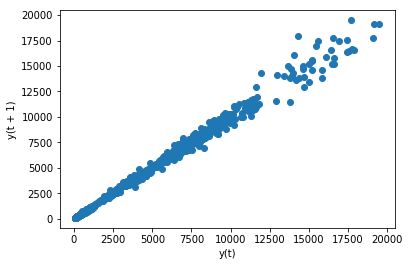

In [57]:
lag_plot(btc['Close**'])
#Non stationary upward trend
#look like correlation exists
#Basically, what there is correlation on price against time. Price is going up.

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

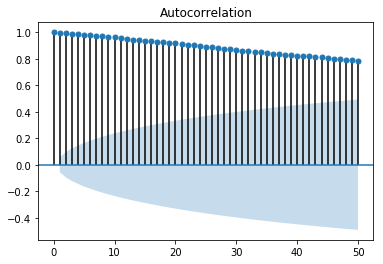

In [59]:
plot_acf(btc_2015_bullrun_to_current['Close**'],lags=50);

AutoRegression - AR

In [60]:
from statsmodels.tsa.ar_model import AR, ARResults

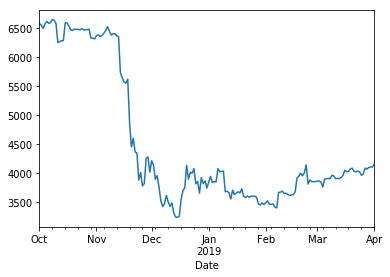

In [61]:
btc_oct_to_apr['Close**'].plot()

In [62]:
btc_2019_bull_run = btc.loc['2018-12-17':]

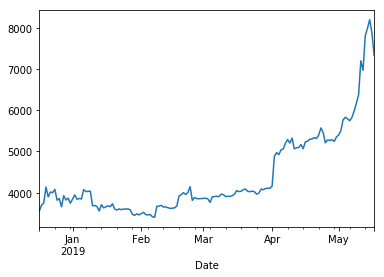

In [63]:
btc_2019_bull_run['Close**'].plot()

In [64]:
len(btc_2019_bull_run)*.8


121.60000000000001

In [65]:
train = btc_2019_bull_run.iloc[:114]

In [66]:
test = btc_2019_bull_run[114:]

In [67]:
#ar 1 model
model = AR(train['Close**'])

In [68]:
AR1fit = model.fit(maxlag=8)

In [69]:
AR1fit.params

const        -276.060247
L1.Close**      0.874005
L2.Close**      0.156503
L3.Close**     -0.026015
L4.Close**      0.017418
L5.Close**      0.013618
L6.Close**     -0.029308
L7.Close**     -0.115708
L8.Close**      0.185218
dtype: float64

In [70]:
start = len(train)

In [71]:
end = len(train) + len(test) - 1

In [72]:
print(start)
print(end)

114
151


In [73]:
AR1fit.predict(start,end)

2019-04-10     5306.578971
2019-04-11     5402.219520
2019-04-12     5484.239914
2019-04-13     5582.349652
2019-04-14     5664.591499
2019-04-15     5770.473031
2019-04-16     5899.729507
2019-04-17     5999.687830
2019-04-18     6112.646309
2019-04-19     6231.966416
2019-04-20     6356.453144
2019-04-21     6490.044163
2019-04-22     6625.703535
2019-04-23     6767.281438
2019-04-24     6921.634126
2019-04-25     7081.136222
2019-04-26     7248.664596
2019-04-27     7424.126428
2019-04-28     7607.790317
2019-04-29     7801.192796
2019-04-30     8003.717899
2019-05-01     8215.241597
2019-05-02     8437.590433
2019-05-03     8670.645335
2019-05-04     8915.137232
2019-05-05     9171.534953
2019-05-06     9440.285885
2019-05-07     9722.217707
2019-05-08    10017.969473
2019-05-09    10328.004907
2019-05-10    10653.152629
2019-05-11    10994.092945
2019-05-12    11351.628488
2019-05-13    11726.573268
2019-05-14    12119.735761
2019-05-15    12532.017995
2019-05-16    12964.377365
2

In [74]:
prediction = AR1fit.predict(start,end)

In [75]:
prediction = prediction.rename('btc predictions')

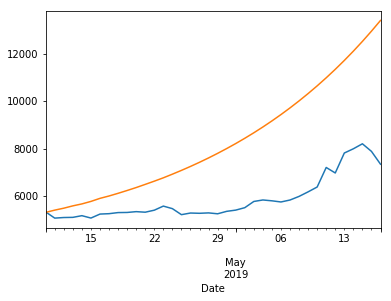

In [76]:
test['Close**'].plot()
prediction.plot()

In [77]:
ARfit2 = model.fit(ic='t-stat')

In [78]:
ARfit2.params

const         24.872853
L1.Close**     0.997378
dtype: float64

Forecasting

In [79]:
len(btc_2019_bull_run)

152

In [80]:
model = AR(btc_2019_bull_run['Close**'])
ARfit = model.fit()
forecasted_values = ARfit.predict(start=len(btc_2019_bull_run),end=len(btc_2019_bull_run)+60).rename('forecast')

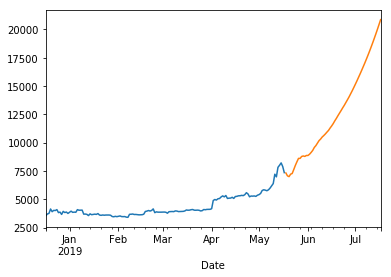

In [81]:
btc_2019_bull_run['Close**'].plot()
forecasted_values.plot()

In [82]:
model = AR(btc['Close**'])
ARfit = model.fit()
forecasted_values = ARfit.predict(start=len(btc),end=len(btc)+60).rename('forecast')

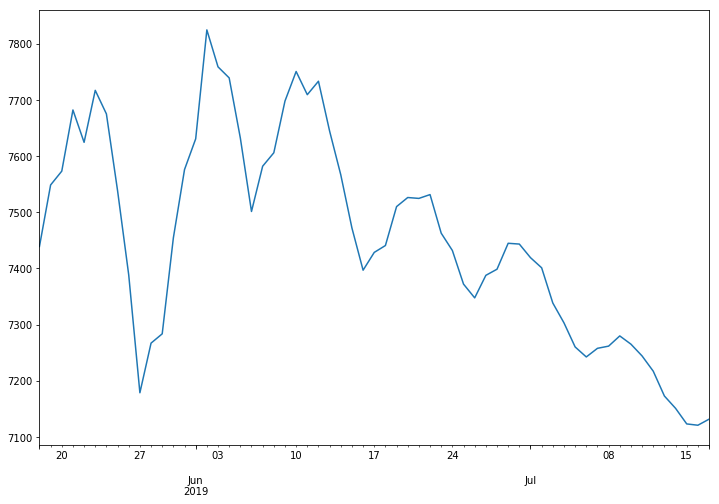

In [83]:
forecasted_values.plot(figsize=(12,8))

Descriptive Stats and Dickey Fuller Test for Testing if Data is Stationary

In [84]:
# Granger Causality Tests -  This test is used to see if there is an indication of causlity, but keep in mind, it could always ne some outside 
# factor unaccounted for!

In [85]:
# non stationary data test
from statsmodels.tsa.stattools import adfuller

In [86]:
adfuller(btc['Close**'])

(-1.6505108469022749,
 0.45677401654182459,
 27,
 2183,
 {'1%': -3.4333490866177807,
  '10%': -2.5674753077239294,
  '5%': -2.8628648959848051},
 29724.101935973562)

In [87]:
btc_test = adfuller(btc['Close**'])
output = pd.Series(btc_test[0:4],index=['ADF Test  Statistic','p-value','# Lags Used','# Observations'])

In [88]:
for key, val in btc_test[4].items():
    output['f critical value ({key})'] = val

In [89]:
output

ADF Test  Statistic           -1.650511
p-value                        0.456774
# Lags Used                   27.000000
# Observations              2183.000000
f critical value ({key})      -2.567475
dtype: float64

In [126]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    
    for key, val in result[4].items():
        out[f'critical value ({key})'] = val
        
    print(out.to_string()) # .to_string() removes the line "dtype: float64"
    
    if result[1] <= .05:
        print("Strong evidence against the null hypthesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit  root and is non-stationary")

In [130]:
adf_test(btc['Close**'],"Bitcoin Analysis")

Augmented Dickey-Fuller Test: Bitcoin Analysis
ADF test statistic        -1.650511
p-value                    0.456774
# lags used               27.000000
# observations          2183.000000
critical value (1%)       -3.433349
critical value (5%)       -2.862865
critical value (10%)      -2.567475
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit  root and is non-stationary


Granger Causality Test

In [75]:
#ADA vs BTC
ada = pd.read_html('https://coinmarketcap.com/currencies/cardano/historical-data/?start=20130428&end=20190521')

In [76]:
ada = ada[0]

In [77]:
ada_dates = ada['Date']

In [78]:
ada_dates = pd.to_datetime(ada_dates)

In [79]:
ada.drop(labels='Date',axis=1,inplace=True)

In [80]:
ada['Date'] = ada_dates

In [81]:
ada.set_index(keys='Date',inplace=True)

In [151]:
ada_close = ada['Close**']
btc_close = btc['Close**']

In [152]:
combined = pd.DataFrame(btc_close)

In [153]:
combined['ADA CLOSE**'] = ada_close

In [150]:
from statsmodels.tsa.stattools import grangercausalitytests

In [159]:
combined.head()

,Close**,ADA CLOSE**
Date,,
2019-05-20,7978.31,0.084848
2019-05-19,8197.69,0.086996
2019-05-18,7271.21,0.079104
2019-05-17,7343.90,0.083260
2019-05-16,7884.91,0.088161


In [158]:
grangercausalitytests(combined[['Close**','ADA CLOSE**']],maxlag=2);


Granger Causality
number of lags (no zero) 1


LinAlgError: SVD did not converge

Forecasting

In [12]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['test','predictions'])

In [13]:
df.head()

,test,predictions
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


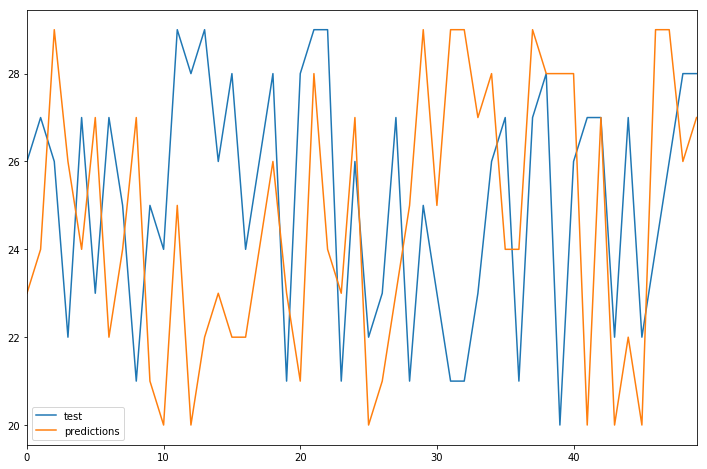

In [16]:
df.plot(figsize=(12,8))

In [17]:
from statsmodels.tools.eval_measures import mse,rmse,meanabs

In [19]:
rmse(df['test'],df['predictions'])

4.1255302689472533

In [69]:
btc.head()

,Open*,High,Low,Close**,Volume,Market Cap
Date,,,,,,
2019-05-21,7977.97,8062.17,7843.34,7963.33,25127245056,141065573610
2019-05-20,8196.92,8200.97,7678.78,7978.31,23843404340,141315695728
2019-05-19,7267.96,8261.94,7267.96,8197.69,25902422040,145185076705
2019-05-18,7341.66,7447.27,7251.50,7271.21,21354286562,128761727083
2019-05-17,7886.93,7929.15,7038.12,7343.90,30066644905,130034777633


In [71]:
btc = btc.resample('MS').mean()

In [73]:
btc = btc.sort_index(ascending=False)

In [74]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

In [96]:
btc.head()

,Open*,High,Low,Close**,Market Cap
Date,,,,,
2019-05-01,6696.267143,6977.019048,6543.513810,6821.252381,1.207156e+11
2019-04-01,5136.813667,5258.515667,5074.575667,5178.470333,9.139432e+10
2019-03-01,3967.739677,4008.783548,3937.973226,3976.070000,6.995238e+10
2019-02-01,3697.178571,3752.560357,3659.894286,3711.907857,6.510641e+10
2019-01-01,3709.706129,3755.833871,3655.715484,3701.555161,6.472019e+10


In [98]:
btc.sort_index(ascending=True,inplace=True)

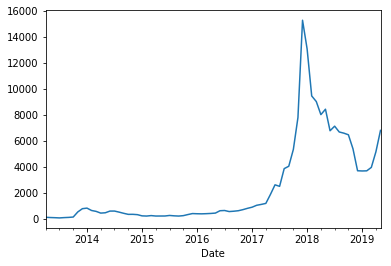

In [100]:
btc['Close**'].plot()

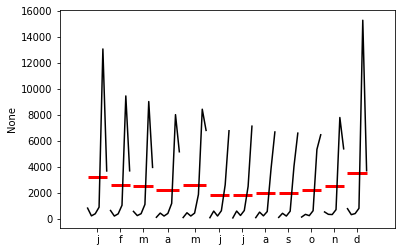

In [103]:
month_plot(btc['Close**']);